In [5]:
import matplotlib.pyplot as plt
import numpy as np
import poppy
from poppy.poppy_core import PlaneType
import astropy.units as u

In [2]:
#Diameter of the lenslet
diamlens = 10000 * u.micron
diamlens = 341 * u.micron

fl_pri = 4410 * u.m #

#focal length of the lenslet
fl_lens = 2.728 * u.mm #1.301

#Distance primary to lenslet //same as foacl length for f/350
d_pr_to_l = 4410 * u.m


In [3]:
scales = poppy.FresnelOpticalSystem(pupil_diameter=100*u.m, npix=256, beam_ratio=0.10)
m1 = poppy.QuadraticLens(fl_pri, name='Primary')
m2 = poppy.QuadraticLens(fl_lens, name='Lenslet')

ap = poppy.MultiHexagonAperture(rings=3, flattoflat=1.8,gap=0.1)  #telescope aperture

scales.add_optic(ap)
scales.add_optic(poppy.SecondaryObscuration(secondary_radius=0.5*u.m))
scales.add_optic(m1)

scales.add_optic(poppy.SquareAperture(size=diamlens),distance=d_pr_to_l)
scales.add_optic(m2)

scales.add_optic(poppy.ScalarTransmission(planetype=PlaneType.pupil, name='focus'),distance=2.728*u.mm);


psf, planes = scales.propagate_mono(wavelength=3.0*u.micron, display_intermediates=False, retain_intermediates=False)


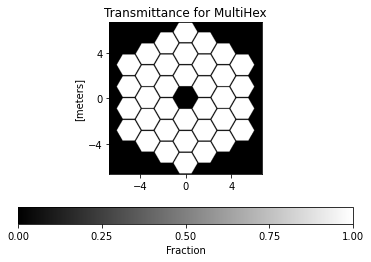

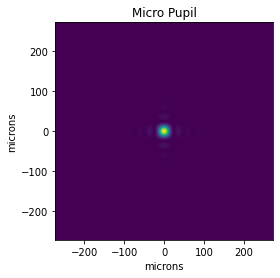

In [4]:
lx=(-1*psf[0].data.shape[0]/2)*psf[0].header['PIXELSCL']*1e6 
rx=(psf[0].data.shape[0]/2)*psf[0].header['PIXELSCL']*1e6 


plt.clf()


ap.display()
plt.figure()

plt.imshow(psf[0].data,extent=[lx,rx,lx,rx])
plt.xlabel('microns')
plt.ylabel('microns')
plt.title('Micro Pupil')

plt.show()